Introduction
For the project, I am selecting 'No-show appointments' data set. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

Here are some of the questions I am trying to answer:

1) Is there a cancellation trend based on when the appointment was made, and the day of the appointemnt. In other words, if the appointment is scheduled close to scheduled day, is there a better chance patient would show up?

2) The dataset has a column labled 'SMS_received'. If the answer to #1 is true, I will check if a reminder a day or so before appointment would help with reducing cancellation? 

3) Is there a cancellation trend for any particular day of the week. In other words, are there more cancellation for a Friday appointment, when compared to an appointemnt for Monday or Tuesday?

4) Based on #3, if an appointment on Friday or Sunday has certain percentage of cancellation consistently, do we need all the staff based on schedule appointment?

5) Which neighbourhood has more cancellation? 

Here are my steps for above questions:

Correlation between different variable and help identify any trend of cancellation. I will be starting my analysis with few variables such as ● ‘ScheduledDay’, ‘Neighborhood’, 'AppointmentDay', 'SMS_received', Patient Demographics such as age and Gender and cancellation flag yes/ no.
ScheduleDay tells us on what day the patient set up their appointment. 
- I plan to start with correlation between appointment scheduled and appointment day. If appointment is schedule on same day as appointment day or close to the appointment day, is there better chance of coming for the appointment. Can a reminder a day or so before appointment day help with reducing cancellation? 
AppointmentDay tells us what day is appointment
- I plan to group data set by each day of the week to help determine days is high volume vs days low volume, and also correlate this with cancellation. Questions include: Is there a particular day when cancellation is higher? This may be helpful for staffing (For example, if an appointment on Friday or Sunday has certain percentage of cancellation consistently, do we need all the staff based on schedule appointment?)
● ‘Neighborhood’ indicates the location of the hospital.
- I plan to explore this variable to see if cancellation has anything to do with distance? If there is a correlation, it will be an opportunity to explore what's the best way to provide treatment to patients coming from long distance.
1) Does it make sense to provide outpatient clinic options for appointment walk-ins, online appointment option etc..


In [1]:
# import pandas, numpy, inline matplotlib and load no-show appointments data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [2]:
#run head function to see what this data looks like
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check which columns have missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It looks like the data is well populated. There are no NULLs in any of the 14 columns. However the datatype for ScheduledDay and AppointmentDay is String. Also, the data type for PatientID is float. I will convert PatientID to Int and update datatype for date column to datetime.

In [4]:
#update PatientId datatype to int and date columns to date
df['PatientId'] = df['PatientId'].astype('int64')
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay']=df['AppointmentDay'].astype('datetime64[ns]')

In [5]:
# confirm data type updates are done correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [6]:
# re-run head to make sure updated column values looks fine
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next step is to check for duplicates in data

In [7]:
# check for duplicates in the data
sum(df.duplicated())

0

The dataset doesnot have any duplicate record.

The last part of cleanup is to standardize column name to all lower case and correct column names

In [8]:
#standardize column names
df.columns = [x.lower() for x in df.columns]
df.rename(columns ={'hipertension':'hypertension', 'handcap':'handicap'}, inplace = True)

In [9]:
#check for consistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null int64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


Correlation between schedule day and apointment day

For this part of analysis, ( will create a variable that captures Day difference between appointment day and scheduled day

In [10]:
#calculate date diff between two dates. Create and use a funtion to just look at date portion
#df[(df.appointmentday-df.scheduledday)] 
def get_day(x):
    return x.date()
df['datediff'] = (df['appointmentday'].apply(get_day) - df['scheduledday'].apply(get_day)).astype('timedelta64[D]').astype(int)

In [11]:
#check the values for datediff column
df['datediff'].value_counts()


 0      38563
 2       6725
 4       5290
 1       5213
 7       4906
 6       4037
 5       3277
 14      2913
 3       2737
 8       2332
 21      1861
 28      1706
 13      1682
 9       1605
 15      1503
 10      1391
 20      1187
 22      1173
 16      1151
 12      1115
 17      1107
 29      1089
 19      1044
 18      1021
 27      1013
 11       987
 35       963
 23       822
 34       808
 26       731
        ...  
 98         5
 112        5
 103        5
 109        5
 108        5
 102        4
-1          4
 105        4
 96         4
 119        4
 122        3
 92         3
 115        2
 93         2
 110        2
 107        2
 97         2
 94         2
 123        1
 101        1
 126        1
 125        1
 139        1
 151        1
 132        1
 117        1
 146        1
 82         1
-6          1
 127        1
Name: datediff, Length: 131, dtype: int64

In [12]:
#confirm datediff is added and popuolated in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
patientid         110527 non-null int64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
datediff          110527 non-null int32
dtypes: datetime64[ns](2), int32(1), int64(9), object(3)
memory usage: 12.2+ MB


Make sure all the schedule day is prior to appointment day

In [13]:
#check for values where schedule day is after appointment day
df[df['datediff']<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,datediff
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [14]:
#clean the data
df_cleaned = df[df['datediff']>=0]

In [15]:
#create a subset of the data to capture missed appointment instances
df_cleaned_no_show = df_cleaned[df_cleaned['no-show'] =='Yes']

In [16]:
#group by datediff and count number of records in each group
df_scheduled_appt_diff = df_cleaned_no_show.groupby(['datediff'])[['no-show']].count()
df_scheduled_appt_diff.reset_index(inplace = True)
df_scheduled_appt_diff.columns = ['datediff', 'count']

Text(0.5, 0, '# of days between scheduled and appointment')

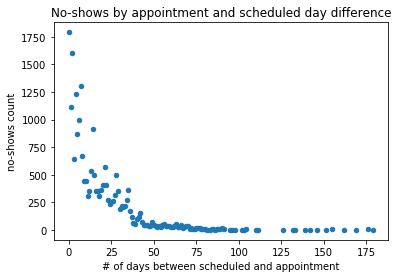

In [18]:
#visualize datediff and value count
df_scheduled_appt_diff.plot(x='datediff', y='count', kind='scatter')
plt.title('No-shows by appointment and scheduled day difference')
plt.ylabel("no-shows count")
plt.xlabel("# of days between scheduled and appointment")

Most of the no show appoitments are made very close to appoitment day. This does not give much information.

Next, I will look at each day of the week and see if there is any cancellation trend by day of the week

In [19]:
#disabling SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'
#df_cleaned['day_of_the_week'] = df_cleaned['appointmentday'].dt.weekday_name

In [20]:
#create a variable to store day of the week
df_cleaned_no_show['day_of_the_week'] = df_cleaned_no_show['appointmentday'].dt.weekday_name

In [21]:
df_cleaned_no_show

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,datediff,day_of_the_week
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Friday
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2,Friday
11,7542951368435,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3,Friday
17,14794966191172,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes,1,Friday
20,622257462899397,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2,Friday
21,12154843752835,5628338,F,2016-04-27 10:50:45,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes,2,Friday
22,863229818887631,5616091,M,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes,4,Friday
31,311284853849,5628907,M,2016-04-27 12:07:14,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,2,Friday
44,274164858852,5635414,F,2016-04-28 13:27:27,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,1,Friday
48,8545415176986,5618643,F,2016-04-26 07:19:49,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,3,Friday


Monday 4689
Tuesday 5150
Wednesday 5092
Thursday 3337
Friday 4037
Saturday 9


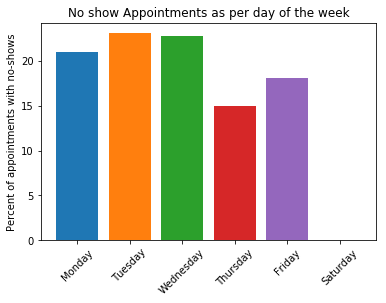

In [22]:
#visualize no-shows by day of the week 
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
for index,i in enumerate(weekdays):
    j=df_cleaned_no_show[df_cleaned_no_show.day_of_the_week==i]
    count=len(j)
    total_count=len(df_cleaned_no_show)

    perc=(count/total_count)*100
    print(i,count)
    plt.bar(index,perc)
    
plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.title('No show Appointments as per day of the week')
plt.ylabel("Percent of appointments with no-shows")
plt.show()

There is no pattern of cancellation for any particular day of the week

In [25]:
#Next, group data by neighbourhood
df_no_show_neighbourhood = df_cleaned_no_show.groupby(['neighbourhood'])[['no-show']].count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8EFD30>]],
      dtype=object)

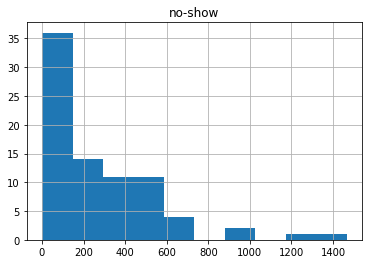

In [59]:
#plot the data in histogram to capture how data is spread
df_no_show_neighbourhood.hist()

In [26]:
#Based on teh output, get the top few values.
df_no_show_neighbourhood_with_high_cancelleation = df_no_show_neighbourhood[df_no_show_neighbourhood['no-show']>=700]


In [27]:
df_no_show = df_no_show_neighbourhood_with_high_cancelleation.sort_values(by='no-show', ascending=False)
#df_no_show_neighbourhood_with_high_cancelleation.sort_values(['no-show']).plot.bar(y='no-show', figsize=(5, 5))
df_no_show

,no-show
neighbourhood,
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,905
CENTRO,703


This provides list of neighbourhood with highest cancellation. Although there are no data elements to further determine distance of these neighbourhood from the hospital, it will be interesting to see that correlation.

With current data elements,I would look at total number of appointments from these neighbourhood and plot a correlation.

In [31]:
#create a variable to capture neighbourhood detail. 
val = ['JARDIM CAMBURI', 'MARIA ORTIZ','ITARARÉ','RESISTÊNCIA','CENTRO']
df_neighbourhood_with_highest_no_show = df_cleaned.loc[df_cleaned['neighbourhood'].isin(val)]


In [32]:
#Create a data frame to capture counts for each val
df_total = df_neighbourhood_with_highest_no_show.groupby('neighbourhood').count().appointmentid
df_total

neighbourhood
CENTRO            3334
ITARARÉ           3514
JARDIM CAMBURI    7717
MARIA ORTIZ       5805
RESISTÊNCIA       4430
Name: appointmentid, dtype: int64

In [33]:
#merge above 2 dataframes
df_combined = df_no_show.merge(df_total, left_on='neighbourhood', right_on='neighbourhood', how='inner')

In [34]:
#confirm merge function worked
df_combined


,no-show,appointmentid
neighbourhood,,
JARDIM CAMBURI,1465,7717
MARIA ORTIZ,1219,5805
ITARARÉ,923,3514
RESISTÊNCIA,905,4430
CENTRO,703,3334


In [35]:
#update the label so it is meaningful
df_combined_upd = df_combined.rename(columns={"appointmentid" : "total"})

In [36]:
#caluculate percent
df_combined_upd['cancellation percent'] = df_combined_upd['no-show']*100 / df_combined_upd['total']

In [37]:
#validate the data
df_combined_upd

,no-show,total,cancellation percent
neighbourhood,,,
JARDIM CAMBURI,1465,7717,18.984061
MARIA ORTIZ,1219,5805,20.999139
ITARARÉ,923,3514,26.266363
RESISTÊNCIA,905,4430,20.428894
CENTRO,703,3334,21.085783


Text(0, 0.5, 'Percent of appointments with no-shows')

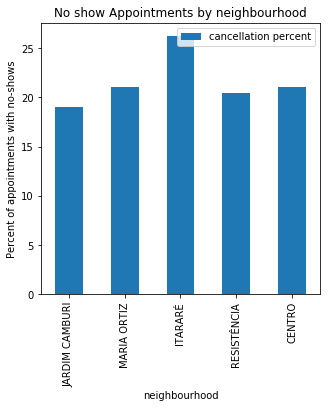

In [61]:
#plot percent cancellation by top neighbourhood
df_combined_upd.plot.bar(y=['cancellation percent'], figsize=(5, 5))
plt.title('No show Appointments by neighbourhood')
plt.ylabel("Percent of appointments with no-shows")
                           

Observation: About 26.26% of appointments are cancelled from ITARARÉ neighbourhood. This can be due to many differnent factors and can't be determined based on the avaialble data elements.

Lastly, I will look at different disease category to determine if there are cancellation prevalant in any one group.

In [44]:
#group data by hypertension
df_no_show_hypertension = df_cleaned_no_show.groupby(['hypertension'])[['no-show']].count()

In [45]:
#calucate percent
df_no_show_hypertension['Cancellation Percent'] = df_no_show_hypertension['no-show']*100/ df_no_show_hypertension['no-show'].sum()

In [46]:
#validate the data
df_no_show_hypertension

,no-show,Cancellation Percent
hypertension,,
0,18542,83.095814
1,3772,16.904186


Text(0, 0.5, 'Percent of appointments with no-shows')

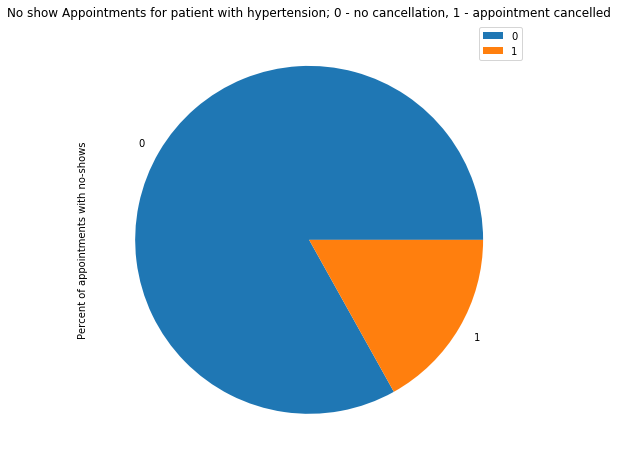

In [66]:
#plot the data
df_no_show_hypertension.plot.pie(y='Cancellation Percent', figsize = (8,8))
plt.title('No show Appointments for patient with hypertension; 0 - no cancellation, 1 - appointment cancelled')
plt.ylabel("Percent of appointments with no-shows")

This plot captures cancellations for patients with hypertension

In [48]:
#similarly, create dataframe by grouping on diabetes
df_no_show_diabetes = df_cleaned_no_show.groupby(['diabetes'])[['no-show']].count()

In [49]:
#calculate percent
df_no_show_diabetes['Cancellation Percent'] = df_no_show_diabetes['no-show']*100/ df_no_show_diabetes['no-show'].sum()

In [50]:
#validate the data
df_no_show_diabetes

,no-show,Cancellation Percent
diabetes,,
0,20884,93.591467
1,1430,6.408533


Text(0, 0.5, 'Percent of appointments with no-shows')

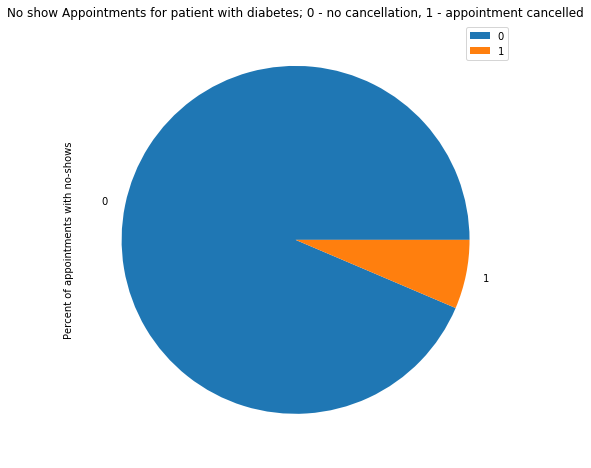

In [67]:
#plot the data
df_no_show_diabetes.plot.pie(y='no-show' , figsize = (8,8))
plt.title('No show Appointments for patient with diabetes; 0 - no cancellation, 1 - appointment cancelled')
plt.ylabel("Percent of appointments with no-shows")

This plot captures cancellations for patients with diabetes



Finally, comparing it to all the appointment cancellation.

In [52]:
#group complete data frame by no-show
df_cleaned_all = df_cleaned.groupby(['no-show']).count().appointmentid

In [53]:
#validate the data
df_cleaned_all

no-show
No     88208
Yes    22314
Name: appointmentid, dtype: int64

In [54]:
#calculate percent
df_cleaned_all['Cancellation Percent'] = df_cleaned_all['No']*100/ df_cleaned_all.sum()

In [55]:
#validate percent
df_cleaned_all

no-show
No                      88208.000000
Yes                     22314.000000
Cancellation Percent       79.810354
Name: appointmentid, dtype: float64

Text(0, 0.5, 'Percent of appointments with no-shows')

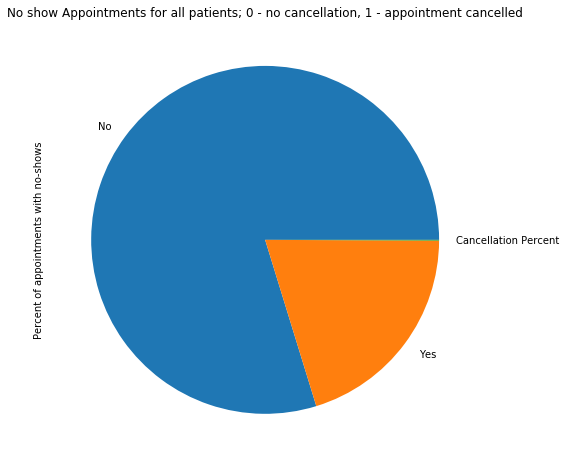

In [68]:
#plot the data
df_cleaned_all.plot.pie(y='no-show' , figsize = (8,8))
plt.title('No show Appointments for all patients; 0 - no cancellation, 1 - appointment cancelled')
plt.ylabel("Percent of appointments with no-shows")

In [ ]:
This plot captures cancellations for all patients.

Conclusion: 

From above analysis, it is evident that 

1) There is no corelation between scheduled day and appointment day in terms on numbner of cancellations.

2) There is no particular cancellation trend based on day of the week. 

3) Neighbourhood such as ITARARÉ, JARDIM CAMBURI has highest number of no-shows. For example, 26.26% of appointments are cancelled from ITARARÉ neighbourhood. This can be due to many differnent factors and can't be determined based on the avaialble data elements

4) Lastly ~83% of patients with hypertension showed up for appointment, whereas as ~93.5% of patients with Diabetes showed up for the appointment. In total 79.73% of total appointments showed up. The higher percentage for hypertension and diabetes suggests the patients with these disease need some immediate treatment.

Limitation:

I think the data set is a first step towards predicting cancellation pattern. Absence of variable such as neighbourhood distance from the hospital limits our ability to correlate distance and cancellation. Furthermore, there are small number of records with schedule day after the appointment day which suggest there are some data quality issues. 